# Lab 2: Regresion Lineal

Considere el conjunto de datos data/dataset_regression_exercise.csv encuentre cual es el modelo polinomico teorico que genero el modelo

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [23]:
data = pd.read_csv('../data/dataset_regression_exercise.csv', index_col=0)
data.head()

,X,Y
0,1.764052,189.685838
1,0.400157,911.544812
2,0.978738,-402.946565
3,2.240893,-3542.403618
4,1.867558,-419.275612


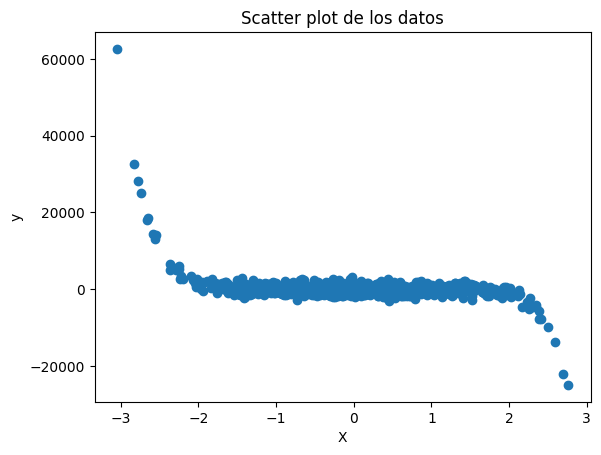

In [24]:
### Scatter plot de los datos
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot de los datos')
plt.show()

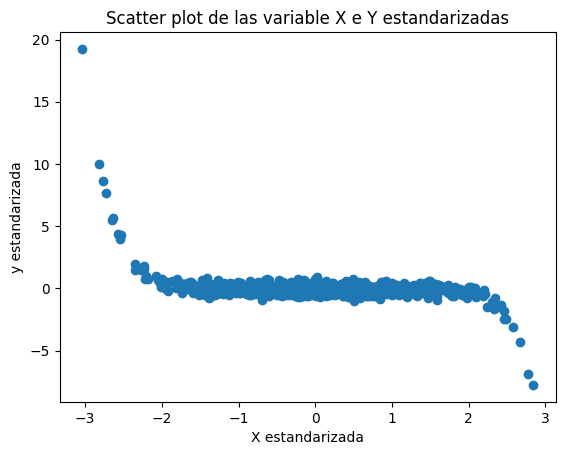

In [25]:
### TO DO: encuentre el modelo polinomico teorico que genero el modelo

### generar potencias de X
X = data[['X']]
y = data['Y']

X_poly = pd.DataFrame()
for degree in range(1, 11):
    X_poly[f'X^{degree}'] = X['X'] ** degree

### estandatizar conjunto de datos
X_poly = (X_poly - X_poly.mean()) / X_poly.std()

### estandarizar variable objetivo
y = (y - y.mean()) / y.std()

### scatter plot de las variable X e Y estandarizadas
plt.scatter(X_poly['X^1'], y)
plt.xlabel('X estandarizada')
plt.ylabel('y estandarizada')
plt.title('Scatter plot de las variable X e Y estandarizadas')
plt.show()

In [26]:
X_poly

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10
0,1.832162,1.566813,1.588522,0.885802,0.856808,0.338226,0.402522,0.065439,0.189502,-0.042952
1,0.451040,-0.598786,0.046576,-0.358646,0.030086,-0.235691,0.035834,-0.173224,0.041042,-0.136087
2,1.036928,-0.013466,0.294826,-0.243714,0.073079,-0.219026,0.041757,-0.171083,0.041781,-0.135830
3,2.315025,2.967909,3.226504,2.887180,2.765922,2.176169,1.993219,1.445101,1.319828,0.882996
4,1.936974,1.842592,1.879577,1.205447,1.129693,0.572366,0.582397,0.203382,0.289054,0.028630
...,...,...,...,...,...,...,...,...,...,...
995,0.463914,-0.591202,0.048368,-0.358206,0.030170,-0.235675,0.035836,-0.173224,0.041042,-0.136087
996,-0.155076,-0.687386,0.026146,-0.361750,0.029574,-0.235768,0.035822,-0.173226,0.041041,-0.136087
997,0.141210,-0.709755,0.028603,-0.361940,0.029589,-0.235769,0.035822,-0.173226,0.041041,-0.136087
998,-1.116278,0.249980,-0.401189,-0.138458,-0.066802,-0.192257,0.017738,-0.165569,0.037943,-0.134823


In [27]:
### Ajustar un modelo de regresion lasso y ajuste de hiperparametro alfa para regularizacion L1
from sklearn.linear_model import Lasso

alpha_log = np.logspace(-4, 2, num=100)  # Genera 100 valores logarítmicamente espaciados entre 10^-4 y 10^2
param_grid = {'alpha': alpha_log}
#print("Valores de alpha usando logspace:", alpha_log)  
# Inicializar el modelo de regresión Lasso
lasso = Lasso(max_iter=10000)
# Realizar la búsqueda de parámetros óptimos con validación cruzada
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_poly, y)
best_alpha_lasso = grid_search.best_params_['alpha']
print(f'Mejor alpha para Lasso: {best_alpha_lasso}')

Mejor alpha para Lasso: 0.001873817422860383


In [28]:
### Imprimir coeficientes con su respectiva potencia
coefficients = grid_search.best_estimator_.coef_
for degree, coef in enumerate(coefficients, start=1):
    print(f'Coeficiente para X^{degree}: {coef}')


Coeficiente para X^1: -0.016036285996012277
Coeficiente para X^2: 0.005854187172761142
Coeficiente para X^3: 0.012335899086417726
Coeficiente para X^4: 0.01588928889358363
Coeficiente para X^5: 0.0
Coeficiente para X^6: 0.0
Coeficiente para X^7: -0.0
Coeficiente para X^8: -0.0
Coeficiente para X^9: -0.9477481678991676
Coeficiente para X^10: -0.0
